## CHRETIEN Tristan 
## Algorithmes de tri

## Installation 

Le code dans ce tp nécessite les bibliothèques ci-dessous.
```py
import timeit
import random
import matplotlib.pylab as plt
```

#### Source :
La plupart des tris ont été pris sur internet :

https://waytolearnx.com/2019/04/tri-par-insertion-en-python.html
https://waytolearnx.com/2019/04/tri-a-bulle-en-python.html
https://waytolearnx.com/2019/04/tri-par-selection-en-python.html
https://www.geeksforgeeks.org/python-program-for-iterative-quick-sort/

# Trie par insertion

- tab1 = [4, 5, 2, 6, 1, 3] (tableau non trier)
- tab2 = [1, 2, 3, 4, 5, 6] (tableau trier)

On souhaite prouve que le tableau tab1 sera trié

Pour le trie d'insertion l'invariant de boucle est le sous tableau de gauche, en découpant le tableau en 2 sous parties avec une partie tous le temps trier et une autre partie à trier. Le tableau t de 1 à j-1 est trié. 

- Initlialisation : 1 seul élement triait qui est l'Élément du sous-tableau de gauche, c'est pour cala qu'on commence la boucle à n+1
- Conservation : On voudrait que le sous-tableau de gauche soit tout le temps trier, on peut voir que dans la boucle l'Élément précédent n'est jamais modifié seulement l'Élément j+1, ce qui empeche la modification de ce dernier. On va uniquement ajouter des éléments à ce tableau.
- Terminaion : Le tableau de gauche devient le tableau complet mais trié.   

```py
def tri_insertion(tab):
    for n in range(1,len(tab)):
        val = tab[n]
        j = n-1
        while j >= 0 and tab[j] > val:
            tab[j+1] = tab[j]
            j = j-1
        tab[j+1] = val
```

Complexité théorique spatial : est de 1 car dans tous les cas possible on stock uniquement la "key" n de la première boucle

Complexité théorique temporelle :
- Pire des cas : Le tableau d'entrer est trié à l'inverse alors la complexiter est de O(n²), car la condition pour le décalage sera verifier à chaque itération et pour chaque itération, il faudra faire le decalage complet.
- Moyen des cas : Le tableau d'entrer est trié de façon aléatoire, donc la condtion pour la 2ème boucle sera verifier de temps en temps, et la complexiter sera alors de O(n²) mais par pour toutes les itérations.  
- Meilleur cas : Le tableau est déjà trié ou le tableau à toute ses valeurs égale, du coup la condition pour la condition pour la 2ème boucle ne se verifie jamais, alors la complexiter est alors de O(n)

### Analyse théorique :

Il faut trier la liste sans utiliser d'autres tableaux. De plus, le seul élément à garder est celui qui doit être inséré (val). La fonction de tri comprend une boucle principale d'index n qui spécifie l'élément à insérer. On commence par n=1 car l'élément d'indice n=0 est déjà en place au départ (le sous tableau de gauche). La clé doit être insérée dans la partie du tableau de l'index 0 à n-1. La condition avec la boucle permet que tant que l'élément de gauche (j) est superieur à celui à droite (val) nous allons faire le décalage.

### Comparaison avec l'implemation si dessous : 

Comme constamment pour le meilleur des cas pour la complexité temparel lorsque le tableau est trié le temps de traitement est extrement court. Ce qui est l'inverse lorsque le tableau est trié à l'envers, car pour chaque itération il faut alors faire tous le décalage complet.

Temps sur un tableau de length de 100 sur des tableaux aléatoire trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux aléatoire trier 0.02 secondes
Temps sur un tableau de length de 10,000 sur des tableaux aléatoire trier 1.99 secondes
Temps sur un tableau de length de 100 sur des tableaux trier à l"envers 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier à l"envers 0.04 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier à l"envers 4.07 secondes
Temps sur un tableau de length de 100 sur des tableaux trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier 0.00 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier 0.00 secondes


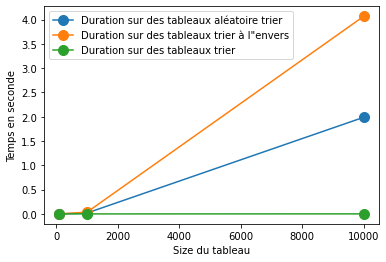

In [2]:
import timeit
import random
import matplotlib.pylab as plt

num_iterations = [100, 1000, 10_000]



lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    
    duration = timeit.timeit("tri_insertion(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux aléatoire trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux aléatoire trier', marker = '.', markersize = 20)

lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=True)
    duration = timeit.timeit("tri_insertion(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier à l"envers {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier à l"envers', marker = '.', markersize = 20)
    
lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=False)
    duration = timeit.timeit("tri_insertion(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier', marker = '.', markersize = 20)
plt.ylabel('Temps en seconde')
plt.xlabel('Size du tableau')
plt.legend()
plt.show()


# Tri par selection

- tab1 = [4, 5, 2, 6, 1, 3] (tableau non trier)
- tab2 = [1, 2, 3, 4, 5, 6] (tableau trier)

On souhaite prouve que le tableau tab1 sera trié

Pour le trie par selection l'invariant de boucle est le sous tableau de gauche qui garde constamement l'élement trié, après une première itération. Le tableau t de 1 à j-1 est trié. 

- Initlialisation : On commance à n car il faut tester toute les itérations dans le tableau donc  j = i
- Conservation : min = i, on boucle après sur i à i+1 sur len(tab) pour aller à l'élement suivant pour boucler sur tous le tableau mais on ne repasse jamais à i-1, donc les élements qui sont déjà switcher sur la gauche ne bougeront plus. 
- Terminaion : Lorsque tous les éléments sont parcouru, ils sont trié car toutes les permutations on eu lieux. 

```py
def tri_selection(tab):
   for i in range(len(tab)):
       min = i
       for j in range(i+1, len(tab)):
           if tab[min] > tab[j]:
               min = j   
       tmp = tab[i]
       tab[i] = tab[min]
       tab[min] = tmp
```

#### Complexité théorique spatial est de O(1) on stock le min sur chaque itération et la variable temporel
#### Complexité théorique temporel :
- Pire des cas : Le tableau d'entrer est trier à l'envers alors la complexiter est de O(n²), Il nous faudra donc refaire toute la liste dans la deuxième boucle pour inverser les valeurs. 
- Moyen des cas : Le tableau d'entrer est trier de façon aléatoire, donc les itérations de la deuxième boucle seront plus ou moins longue mais la complexité reste à O(n²)
- Meilleur cas : Le tableau est déjà trier ou le tableau à toute ses valeurs égale, du coup lors de la deuxième boucle il n'y aura que 1 seule itération, alors la complexiter est alors de O(n²) 

Pour ce trie la complexiter sera tous le temps de O(n²)

### Analyse théorique :

Il faut trier la liste sans utiliser d'autres tableaux. Mais il nous faut utiliser une variable temporel pour pouvoir inverser lors de la selection et la variable min pour chaque itération qui sera modifier lors de la deuxième boucle qui itére sur chaque élement du tableau, Cette fonction de trie comprend donc 2 boucles ou l'ont à pas le choix de passer dedans. Car pour chaque élement il lui faut tester tous les élements suivant.

### Comparaison avec l'implemation si dessous : 

Dans tous les cas cet implematation nécessite un bouclage de deux liste imbriqué la complexiter sera tous le temps de O(n²), comme on peut le voir dans les résultats le temps de traitement est sensiblement le même.


In [3]:
def tri_selection(tab):
   for i in range(len(tab)):
       min = i
       for j in range(i+1, len(tab)):
           if tab[min] > tab[j]:
               min = j   
       tmp = tab[i]
       tab[i] = tab[min]
       tab[min] = tmp

lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    
    duration = timeit.timeit("tri_selection(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux aléatoire trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux aléatoire trier', marker = '.', markersize = 20)

lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=True)
    duration = timeit.timeit("tri_selection(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier à l"envers {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier à l"envers', marker = '.', markersize = 20)
    
lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=False)
    duration = timeit.timeit("tri_selection(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier', marker = '.', markersize = 20)
plt.ylabel('Temps en seconde')
plt.xlabel('Size du tableau')
plt.legend()
plt.show()

Temps sur un tableau de length de 100 sur des tableaux aléatoire trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux aléatoire trier 0.03 secondes
Temps sur un tableau de length de 10,000 sur des tableaux aléatoire trier 2.69 secondes
Temps sur un tableau de length de 100 sur des tableaux trier à l"envers 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier à l"envers 0.03 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier à l"envers 2.65 secondes
Temps sur un tableau de length de 100 sur des tableaux trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier 0.02 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier 2.52 secondes


# Tri à bulle

- tab1 = [4, 5, 2, 6, 1, 3] (tableau non trier)
- tab2 = [1, 2, 3, 4, 5, 6] (tableau trier)

On souhaite prouver que le tableau tab1 sera trié

Pour le trie par sélection l'invariant de boucle est un sous tableau de droite qui est trier, c'est à dire que le dernier élément du tableau sera le trier et il ne changera jamais lors de la première iteration. le tableau t à len(t)-1 est trier. 

- Initlialisation : On commence à n car il faut tester toute les itérations dans le tableau puis pour la deuxième boucle jusqu'à n-i-1 on ne test pas le dernier élément du tableau.
- Conservation : On vaudrais que les éléments du sous tableau de droite soit toujours trier, et comme on vérifie que l’élément j > j+1 on inverse alors et continue l'itération à n-i-1 alors les valeurs droite trié qui s'accumule sont tous le trier et inchangées.
- Terminaison : Le tableau est trier lorsque toute les valeurs du tableau seront parcouru et que toute ses dernières ont vérifier que l'élément suivant soit plus grand que elle même soit tab[j] > tab[j+1]

```py
def tri_bulle(tab):
    n = len(tab)
    for i in range(n):
        for j in range(0, n-i-1):
            if tab[j] > tab[j+1] :
                tab[j], tab[j+1] = tab[j+1], tab[j]
```

#### Complexité théorique spatial est de 1 car dans tous les cas possible on stock la variable temporel 
#### Complexité théorique temporel :
- Pire des cas : Le tableau d'entrer est trier à l'inverse alors la complexité est de O(n²), Il nous faudra donc refaire toute la liste dans la deuxième boucle pour inverser les valeurs. 
- Moyen des cas : Le tableau d'entrer est trier de façon aléatoire, donc les itérations de la deuxième boucle seront plus ou moins longue mais la complexité reste à O(n²)
- Meilleur cas : Le tableau est déjà trier ou le tableau à toute ses valeurs égale, du coup lors de la deuxième boucle il n'y aura que 1 seule fois ou la condition dans al deuxième boucle est vérifier O(n)


### Analyse théorique :

Il faut trier la liste sans utiliser d'autres tableaux. Il nous faut utiliser une variable temporel pour pouvoir inverser lors de la sélection. Il faut cela pour pouvoir inverser les deux éléments entre eux si l’élément j > j+1, puis on passe à l’élément suivant, les itérations de la deuxième boucle sont décroissante plus on avance dans la boucle moins la deuxième boucle sera longue. Tous comme le trie par sélection ce trie nécessite un bouclage complet des listes imbriqué. Mais à la différence du trie par sélection si les valeurs le tableau est trié à l'envers alors il faudrait repeter l'inversion des valeurs à chaque fois.

### Comparaison avec l'implemation si dessous :

Dans tous les cas cet implémentation nécessite un bouclage de deux liste imbriqué la complexité sera tous le temps de O(n²), mais en plus ce cela selon comment la liste est trié de base le temps de calcule n'est pas le même est en effet si une liste est trié a l'envers alors le temps de traitement sera plus long.


In [4]:
def tri_bulle(tab):
    n = len(tab)
    for i in range(n):
        for j in range(0, n-i-1):
            if tab[j] > tab[j+1] :
                tab[j], tab[j+1] = tab[j+1], tab[j]

lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    
    duration = timeit.timeit("tri_bulle(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux aléatoire trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux aléatoire trier', marker = '.', markersize = 20)

lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=True)
    duration = timeit.timeit("tri_bulle(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier à l"envers {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier à l"envers', marker = '.', markersize = 20)
    
lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=False)
    duration = timeit.timeit("tri_bulle(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier', marker = '.', markersize = 20)
plt.ylabel('Temps en seconde')
plt.xlabel('Size du tableau')
plt.legend()
plt.show()

Temps sur un tableau de length de 100 sur des tableaux aléatoire trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux aléatoire trier 0.06 secondes
Temps sur un tableau de length de 10,000 sur des tableaux aléatoire trier 6.24 secondes
Temps sur un tableau de length de 100 sur des tableaux trier à l"envers 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier à l"envers 0.07 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier à l"envers 8.43 secondes
Temps sur un tableau de length de 100 sur des tableaux trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier 0.03 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier 3.79 secondes


# Tri rapide

- Diviser pour régner

```py
def tri_rapide_partition(array,low,high):
    i = ( low - 1 )
    x = array[high]
 
    for j in range(low , high):
        if   array[j] <= x:
 
            i = i+1
            array[i],array[j] = array[j],array[i]
 
    array[i+1],array[high] = array[high],array[i+1]
    return (i+1)

def tri_rapide(array):
    low = 0
    high = len(array) - 1
    size = high - low + 1
    stack = [0] * (size)
    top = -1
    top = top + 1
    stack[top] = low
    top = top + 1
    stack[top] = high
    while top >= 0:
        high = stack[top]
        top = top - 1
        low = stack[top]
        top = top - 1
        p = tri_rapide_partition( array, low, high )
        if p-1 > low:
            top = top + 1
            stack[top] = low
            top = top + 1
            stack[top] = p - 1
        if p+1 < high:
            top = top + 1
            stack[top] = p + 1
            top = top + 1
            stack[top] = high
```

### Complexité théorique spatial est de O(n) dans le pire des cas et O(log n) dans la moyenne
### Complexité théorique temporel :
- Pire des cas : O(n²)
- Moyen des cas : O(n log n)
- Meilleur cas : O(n)

### Analyse théorique :

On place un pivot à sa place définitive, en permutant tous les éléments de telle sorte que tous ceux qui sont inférieurs au pivot soient à sa gauche et que tous ceux qui sont supérieurs au pivot soient à sa droite. Pour chacun des sous-tableaux, on définit un nouveau pivot et on répète l'opération de partitionnement. On répète cela jusqu’à que tous les éléments soit trié.

Le choix du pivot influence la complexité selon comment le tableau est trier mais au final en moyenne la complexité est O(n log n) est dans le pire des cas O(n²). Mais en moyenne lorsque le pivot est aléatoire le temps de traitement est plus long.

### Comparaison avec implantation si dessous :

Le temps de traitement est différent selon le pivot est comment la liste de base est trié, on observe que si la liste est trié est le pivot est la première valeur alors le temps de traitement est beaucoup plus, ce qui est le cas pour l'inverse si le tableau est trié à l'envers et que le pivot est la dernière valeur du tableau le temps sera aussi long. Mais plus globalement lorsque le tableau est trié le temps de traitement est plus long. On constate aussi que le pivot aléatoire à un temps de traitement est plus long.


Temps sur un tableau de length de 100 sur des tableaux aléatoire trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux aléatoire trier 0.00 secondes
Temps sur un tableau de length de 10,000 sur des tableaux aléatoire trier 0.02 secondes
Temps sur un tableau de length de 100 sur des tableaux trier à l"envers 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier à l"envers 0.05 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier à l"envers 1.85 secondes
Temps sur un tableau de length de 100 sur des tableaux trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier 0.06 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier 6.86 secondes


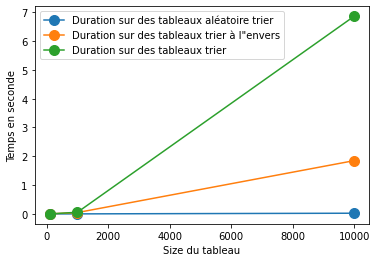

RESULAT AVEC COMME PIVOT LA PREMIER VALEUR DU TABLEAU


In [5]:
def tri_rapide_partition(array,low,high):
    i = ( low - 1 )
    x = array[high]
 
    for j in range(low , high):
        if   array[j] <= x:
 
            i = i+1
            array[i],array[j] = array[j],array[i]
 
    array[i+1],array[high] = array[high],array[i+1]
    return (i+1)

def tri_rapide(array):
    low = 0
    high = len(array) - 1
    size = high - low + 1
    stack = [0] * (size)
    top = -1
    top = top + 1
    stack[top] = low
    top = top + 1
    stack[top] = high
    while top >= 0:
        high = stack[top]
        top = top - 1
        low = stack[top]
        top = top - 1
        p = tri_rapide_partition( array, low, high )
        if p-1 > low:
            top = top + 1
            stack[top] = low
            top = top + 1
            stack[top] = p - 1
        if p+1 < high:
            top = top + 1
            stack[top] = p + 1
            top = top + 1
            stack[top] = high

lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    
    duration = timeit.timeit("tri_rapide(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux aléatoire trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux aléatoire trier', marker = '.', markersize = 20)

lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=True)
    duration = timeit.timeit("tri_rapide(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier à l"envers {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier à l"envers', marker = '.', markersize = 20)
    
lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=False)
    duration = timeit.timeit("tri_rapide(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier', marker = '.', markersize = 20)
plt.ylabel('Temps en seconde')
plt.xlabel('Size du tableau')
plt.legend()
plt.show()
print("RESULAT AVEC COMME PIVOT LA PREMIER VALEUR DU TABLEAU")

In [6]:
def tri_rapide_partition(array,low,high):
    i = ( low - 1 )
    x = array[high]
 
    for j in range(low , high):
        if   array[j] <= x:
 
            i = i+1
            array[i],array[j] = array[j],array[i]
 
    array[i+1],array[high] = array[high],array[i+1]
    return (i+1)

def tri_rapide(array):
    low = 0
    high = len(array) - 1
    size = high - low + 1
    stack = [0] * (size)
    top = -1
    top = top + 1
    stack[top] = low
    top = top + 1
    stack[top] = high
    while top >= 0:
        high = stack[top]
        top = top - 1
        low = stack[top]
        top = top - 1
        p = tri_rapide_partition( array, low, high )
        if p-1 > low:
            top = top + 1
            stack[top] = low
            top = top + 1
            stack[top] = p - 1
        if p+1 < high:
            top = top + 1
            stack[top] = p + 1
            top = top + 1
            stack[top] = high
 
lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    
    duration = timeit.timeit("tri_rapide(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux aléatoire trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux aléatoire trier', marker = '.', markersize = 20)

lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=True)
    duration = timeit.timeit("tri_rapide(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier à l"envers {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier à l"envers', marker = '.', markersize = 20)
    
lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=False)
    duration = timeit.timeit("tri_rapide(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier', marker = '.', markersize = 20)
plt.ylabel('Temps en seconde')
plt.xlabel('Size du tableau')
plt.legend()
plt.show()
print("RESULAT AVEC COMME PIVOT LA DERNIERE VALEUR DU TABLEAU")

Temps sur un tableau de length de 100 sur des tableaux aléatoire trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux aléatoire trier 0.00 secondes
Temps sur un tableau de length de 10,000 sur des tableaux aléatoire trier 0.03 secondes
Temps sur un tableau de length de 100 sur des tableaux trier à l"envers 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier à l"envers 0.03 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier à l"envers 1.78 secondes
Temps sur un tableau de length de 100 sur des tableaux trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier 0.06 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier 5.91 secondes


RESULAT AVEC COMME PIVOT LA DERNIERE VALEUR DU TABLEAU


Temps sur un tableau de length de 100 sur des tableaux aléatoire trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux aléatoire trier 0.00 secondes
Temps sur un tableau de length de 10,000 sur des tableaux aléatoire trier 0.02 secondes
Temps sur un tableau de length de 100 sur des tableaux trier à l"envers 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier à l"envers 0.04 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier à l"envers 1.79 secondes
Temps sur un tableau de length de 100 sur des tableaux trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier 0.06 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier 6.07 secondes


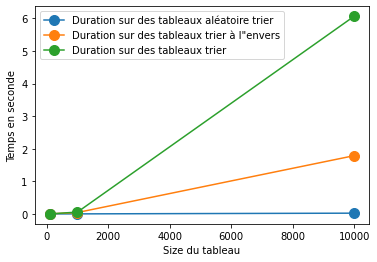

RESULAT AVEC COMME PIVOT UNE VALEUR ALÉATOIRE DU TABLEAU


In [7]:
def tri_rapide_partition(array,low,high):
    i = ( low - 1 )
    x = array[high]
 
    for j in range(low , high):
        if   array[j] <= x:
 
            i = i+1
            array[i],array[j] = array[j],array[i]
 
    array[i+1],array[high] = array[high],array[i+1]
    return (i+1)

def tri_rapide(array):
    low = 0
    high = len(array) - 1
    size = high - low + 1
    stack = [0] * (size)
    top = -1
    top = top + 1
    stack[top] = low
    top = top + 1
    stack[top] = high
    while top >= 0:
        high = stack[top]
        top = top - 1
        low = stack[top]
        top = top - 1
        p = tri_rapide_partition( array, low, high )
        if p-1 > low:
            top = top + 1
            stack[top] = low
            top = top + 1
            stack[top] = p - 1
        if p+1 < high:
            top = top + 1
            stack[top] = p + 1
            top = top + 1
            stack[top] = high
 
lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    
    duration = timeit.timeit("tri_rapide(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux aléatoire trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux aléatoire trier', marker = '.', markersize = 20)

lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=True)
    duration = timeit.timeit("tri_rapide(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier à l"envers {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier à l"envers', marker = '.', markersize = 20)
    
lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=False)
    duration = timeit.timeit("tri_rapide(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier', marker = '.', markersize = 20)
plt.ylabel('Temps en seconde')
plt.xlabel('Size du tableau')
plt.legend()
plt.show()
print("RESULAT AVEC COMME PIVOT UNE VALEUR ALÉATOIRE DU TABLEAU")

# Tri Fusion

- Diviser pour régner

```py
def selection(tab):
  for i in range(len(tab)-1):
      min = i
      for j in range(i+1,len(tab)):
        if tab[j] < tab[min]:
          min = j
      tab[min], tab[i] = tab[i], tab[min]
  return tab
  
def tri_fusion(tab):
  m = len(tab)//2
  tab1 = selection(tab[0:m])
  tab2 = selection(tab[m:])
  
  i1,i2,n1,n2=0,0,len(tab1), len(tab2)
  res = []
  while i1<n1 and i2<n2:
    if tab1[i1] < tab2[i2]:
      res.append(tab1[i1])
      i1+=1
    else:
      res.append(tab2[i2])
      i2+=1
  if i1==n1:
    res.extend(tab2[i2:])
  else:
    res.extend(tab1[i1:])
  return res

liste = []
for k in range(11):
    liste.append(random.randint(0,20))
liste_triee = tri_fusion(liste)
```

### Complexité théorique spatial est de O(n) dans le pire des cas et O(1) dans le meilleur

### Complexité théorique temporel :
- Pire des cas : O(n log n)
- Moyen des cas : O(n log n)
- Meilleur cas : O(n log n)

### Analyse théorique :

Algo diviser pour régner

On souhaite construire un tableau trié avec deux tableaux triés. Cela consiste donc à couper les tableaux en deux et de même longueur, triés c'est dernier puis les combiné en un seul tableau trié.

### Comparaison avec implantation si dessous :

On peut voir dans les résultat si dessous que peut importe comment le tableau d'entrer est trier, les temps de traitement sont identiques ce qui convient au fait que comme au divise notre tableau en plein de sous tableau de 2 voir 1 élément pour les trier la place de tous les éléments importe plus vraiment, comparer à un trie par insertion ou sélection.

 

Temps sur un tableau de length de 100 sur des tableaux aléatoire trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux aléatoire trier 0.01 secondes
Temps sur un tableau de length de 10,000 sur des tableaux aléatoire trier 1.32 secondes
Temps sur un tableau de length de 100 sur des tableaux trier à l"envers 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier à l"envers 0.02 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier à l"envers 1.36 secondes
Temps sur un tableau de length de 100 sur des tableaux trier 0.00 secondes
Temps sur un tableau de length de 1,000 sur des tableaux trier 0.01 secondes
Temps sur un tableau de length de 10,000 sur des tableaux trier 1.31 secondes


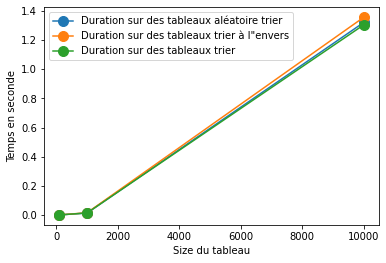

In [8]:
def selection(tab):
  for i in range(len(tab)-1):
      min = i
      for j in range(i+1,len(tab)):
        if tab[j] < tab[min]:
          min = j
      tab[min], tab[i] = tab[i], tab[min]
  return tab
  
def tri_fusion(tab):
  m = len(tab)//2
  tab1 = selection(tab[0:m])
  tab2 = selection(tab[m:])
  
  i1,i2,n1,n2=0,0,len(tab1), len(tab2)
  res = []
  while i1<n1 and i2<n2:
    if tab1[i1] < tab2[i2]:
      res.append(tab1[i1])
      i1+=1
    else:
      res.append(tab2[i2])
      i2+=1
  if i1==n1:
    res.extend(tab2[i2:])
  else:
    res.extend(tab1[i1:])
  return res


lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    
    duration = timeit.timeit("tri_fusion(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux aléatoire trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux aléatoire trier', marker = '.', markersize = 20)

lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=True)
    duration = timeit.timeit("tri_fusion(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier à l"envers {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier à l"envers', marker = '.', markersize = 20)
    
lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    liste.sort(reverse=False)
    duration = timeit.timeit("tri_fusion(liste)", number = 1, globals=globals())
    print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Duration sur des tableaux trier', marker = '.', markersize = 20)
plt.ylabel('Temps en seconde')
plt.xlabel('Size du tableau')
plt.legend()
plt.show()

# Tri Stupide

```py
def tri_stupide(a):
    n = len(a)
    while (is_sorted(a)== False):
        random(a)
  
def is_sorted(a):
    n = len(a)
    for i in range(0, n-1):
        if (a[i] > a[i+1] ):
            return False
    return True
  
def random(a):
    n = len(a)
    for i in range (0,n):
        r = random.randint(0,n-1)
        a[i], a[r] = a[r], a[i]
```

### Complexité théorique spatial est de O(n)

### Complexité théorique temporel :
- Pire des cas : factoriel
- Moyen des cas : O(n+1)
- Meilleur cas : O(n)

### Analyse théorique :

Consiste à vérifier si les éléments sont ordonnés et s'ils ne le sont pas, à les mélanger aléatoirement, puis à recommencer autant de fois que nécessaire.

## Implementation commenter car temps de traitement beaucoup trop long pour le tri stupide.

In [9]:
def tri_stupide(a):
    n = len(a)
    while (is_sorted(a)== False):
        random(a)
  
def is_sorted(a):
    n = len(a)
    for i in range(0, n-1):
        if (a[i] > a[i+1] ):
            return False
    return True
  
def random(a):
    n = len(a)
    for i in range (0,n):
        r = random.randint(0,n-1)
        a[i], a[r] = a[r], a[i]

# lX = []
# for val in num_iterations:
#     liste = []
#     for k in range(val):
#         liste.append(random.randint(0,1000))
    
#     duration = timeit.timeit("stupide(liste)", number = 1, globals=globals())
#     print(f'Temps sur un tableau de length de {val:,d} sur des tableaux aléatoire trier {duration:.2f} secondes')
#     lX.append(duration)

# plt.plot(num_iterations, lX, label='Duration sur des tableaux aléatoire trier', marker = '.', markersize = 20)

# lX = []
# for val in num_iterations:
#     liste = []
#     for k in range(val):
#         liste.append(random.randint(0,1000))
#     liste.sort(reverse=True)
#     duration = timeit.timeit("stupide(liste)", number = 1, globals=globals())
#     print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier à l"envers {duration:.2f} secondes')
#     lX.append(duration)

# plt.plot(num_iterations, lX, label='Duration sur des tableaux trier à l"envers', marker = '.', markersize = 20)
    
# lX = []
# for val in num_iterations:
#     liste = []
#     for k in range(val):
#         liste.append(random.randint(0,1000))
#     liste.sort(reverse=False)
#     duration = timeit.timeit("stupide(liste)", number = 1, globals=globals())
#     print(f'Temps sur un tableau de length de {val:,d} sur des tableaux trier {duration:.2f} secondes')
#     lX.append(duration)

# plt.plot(num_iterations, lX, label='Duration sur des tableaux trier', marker = '.', markersize = 20)
# plt.ylabel('Temps en seconde')
# plt.xlabel('Size du tableau')
# plt.legend()
# plt.show()


## Comparer les tris

In [11]:
lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    duration = timeit.timeit("tri_fusion(liste)", number = 1, globals=globals())
    print(f'Tri_fusion ==> Temps sur un tableau de length de {val:,d} sur des tableaux aléatoire trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Tri par fusion', marker = '.', markersize = 20)

lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    duration = timeit.timeit("tri_selection(liste)", number = 1, globals=globals())
    print(f'Tri_selection ==> Temps sur un tableau de length de {val:,d} sur des tableaux trier à l"envers {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Tri par selection', marker = '.', markersize = 20)
    
lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    duration = timeit.timeit("tri_insertion(liste)", number = 1, globals=globals())
    print(f'Tri_insertion ==> Temps sur un tableau de length de {val:,d} sur des tableaux trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Tri par insertion', marker = '.', markersize = 20)

lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    duration = timeit.timeit("tri_bulle(liste)", number = 1, globals=globals())
    print(f'Tri_bulle ==> Temps sur un tableau de length de {val:,d} sur des tableaux trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Tri à bulle', marker = '.', markersize = 20)
    
lX = []
for val in num_iterations:
    liste = []
    for k in range(val):
        liste.append(random.randint(0,1000))
    duration = timeit.timeit("tri_rapide(liste)", number = 1, globals=globals())
    print(f'Tri_rapide ==> Temps sur un tableau de length de {val:,d} sur des tableaux trier {duration:.2f} secondes')
    lX.append(duration)

plt.plot(num_iterations, lX, label='Tri rapide', marker = '.', markersize = 20)

plt.xlabel('Size du tableau')
plt.ylabel('Temps en seconde')
plt.legend()
plt.show()

Tri_fusion ==> Temps sur un tableau de length de 100 sur des tableaux aléatoire trier 0.00 secondes
Tri_fusion ==> Temps sur un tableau de length de 1,000 sur des tableaux aléatoire trier 0.02 secondes
Tri_fusion ==> Temps sur un tableau de length de 10,000 sur des tableaux aléatoire trier 1.37 secondes
Tri_selection ==> Temps sur un tableau de length de 100 sur des tableaux trier à l"envers 0.00 secondes
Tri_selection ==> Temps sur un tableau de length de 1,000 sur des tableaux trier à l"envers 0.03 secondes
Tri_selection ==> Temps sur un tableau de length de 10,000 sur des tableaux trier à l"envers 2.63 secondes
Tri_insertion ==> Temps sur un tableau de length de 100 sur des tableaux trier 0.00 secondes
Tri_insertion ==> Temps sur un tableau de length de 1,000 sur des tableaux trier 0.03 secondes
Tri_insertion ==> Temps sur un tableau de length de 10,000 sur des tableaux trier 2.79 secondes
Tri_bulle ==> Temps sur un tableau de length de 100 sur des tableaux trier 0.00 secondes
Tri_b

#### On constate donc que le tri à Bulle est le moins efficace des 5 et le tri rapide est largement le meilleur puis le tri fusion est enfin les tris par insertion et selection ont sensiblement le même temps de traitement.

#### Il est courant de mélanger tri fusion et tri insertion, pourquoi? Qu’est ce que ce change ? Pourquoi est-ce valable.


#### À quel point tester si la liste est triée permet d’économiser du temps ?

Comme nous l'avons vu précédemment le temps de traitement selon les algo, des tris peuvent grandement diminuer au augmenter selon si oui ou non cette liste est triée, on a vu par exemple que pour la trie à bulle, insertion ou rapide que cela change énormément de chose tandis que pour d'autres cela ne change rien comme pour la fusion ou la sélection.
Permettre de savoir si la liste est triée ou non permettrait de choisir le meilleur algo et ainsi améliorer nos performance.

### Un algorithme est dit stable si il permet de préserver l’ordre initial dans la cas d’ex-æquo. Est-ce que vos algorithmes sont stables?

Par leur nature certain algo sont stables comme le tri par insertion, fusion et à Bulle.
Nous trions des nombres alors les algorithmes seront toujours stables, même la trie rapide qui par nature n'est pas stable devient car nous comparer strictement les nombres. 